# Digital Naturalist - AI enabled tool for Biodiversity Researchers

# Sprint-1 Deliverables:
1. Data Acquisition - Collection and digitalizing data for analysis
2. Data Understanding
3. Feature Engineering
4. Data Augumentation
5. Model Building

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,GlobalAveragePooling2D,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
IMAGE_SIZE = [229,229]
path = '../input/dn-ai/Digital Naturalist datasss'

# About the data
**5 Species => 142 sub - classes**
1. ANIMALS
2. LEAVES
3. SEA ANIMALS
4. FLOWERS
5. BIRDS

**Training set** = 17271 images <br>
**Testing set** = 7382 images

# Data Augumentation

In [7]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data_gen = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [8]:
training_set = train_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 17271 images belonging to 142 classes.
Found 7382 images belonging to 142 classes.


In [9]:
training_set.class_indices

{'Apple Leaf': 0,
 'Arrowhead Leaf': 1,
 'Bamboo Leaf': 2,
 'Banana Leaf': 3,
 'Bluebell': 4,
 'Buttercup': 5,
 'Coltsfoot': 6,
 'Corals': 7,
 'Corpse Flower': 8,
 'Cowslip': 9,
 'Crabs': 10,
 'Crocus': 11,
 'Currant Leaf': 12,
 'Curry Leaf': 13,
 'Daffodil': 14,
 'Dolphin': 15,
 'Duckpotato Leaf': 16,
 'Eel': 17,
 'Fig Leaf': 18,
 'Fritillary': 19,
 'Gooseberry Leaf': 20,
 'Great Indian Bustard Bird': 21,
 'Guava Leaf': 22,
 'Iris': 23,
 'Irrelevant': 24,
 'Jelly Fish': 25,
 'Lady Slipper Orchid Flower': 26,
 'Lemon Leaf': 27,
 'Lily Valley': 28,
 'Lobster': 29,
 'Mango Leaf': 30,
 'Mulberry Leaf': 31,
 'Nudibranchs': 32,
 'Octopus': 33,
 'Pangolin Mammal': 34,
 'Pansy': 35,
 'Papaya Leaf': 36,
 'Pine Leaf': 37,
 'Puffers': 38,
 'Raddish Leaf': 39,
 'Raspberry Leaf': 40,
 'Rose Leaf': 41,
 'Sea Rays': 42,
 'Sea Urchins': 43,
 'Seahorse': 44,
 'Seal': 45,
 'Senenca White Deer Mammal': 46,
 'Sharks': 47,
 'Snowdrop': 48,
 'Spoon Billed Sandpiper Bird': 49,
 'Squid': 50,
 'Starfish': 51,

In [10]:
from glob import glob
folders = glob('../input/dn-ai/Digital Naturalist datasss/*')
len(folders)

142

# Model Building

In [11]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

2022-11-02 09:59:57.072012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:59:57.158903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:59:57.159714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:59:57.161445: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 4s 0us/step


In [12]:
for layer in inception.layers:
    layer.trainable = False
    
for layer in inception.layers[250:]:
    layer.trainable = True

In [13]:
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(units = 142, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 142)               7270542   
Total params: 29,073,326
Trainable params: 17,811,982
Non-trainable params: 11,261,344
_________________________________________________________________


In [14]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.summary()

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

In [18]:
result = model.fit(training_set, validation_data=testing_set, epochs=50,
    steps_per_epoch=len(training_set),validation_steps=len(testing_set),callbacks=callback)

2022-11-02 10:00:08.582671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-02 10:00:15.896924: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


173/173 [==============================] - 385s 2s/step - loss: 1.9036 - accuracy: 0.6191 - val_loss: 0.9961 - val_accuracy: 0.7368
Epoch 2/50
173/173 [==============================] - 324s 2s/step - loss: 0.6248 - accuracy: 0.8231 - val_loss: 0.9225 - val_accuracy: 0.7692
Epoch 3/50
173/173 [==============================] - 322s 2s/step - loss: 0.4367 - accuracy: 0.8737 - val_loss: 0.8945 - val_accuracy: 0.7807
Epoch 4/50
173/173 [==============================] - 321s 2s/step - loss: 0.3099 - accuracy: 0.9068 - val_loss: 1.0024 - val_accuracy: 0.7846
Epoch 5/50
173/173 [==============================] - 319s 2s/step - loss: 0.2374 - accuracy: 0.9281 - val_loss: 1.1139 - val_accuracy: 0.7772
Epoch 6/50
173/173 [==============================] - 319s 2s/step - loss: 0.2027 - accuracy: 0.9396 - val_loss: 0.9030 - val_accuracy: 0.8067
Epoch 7/50
173/173 [==============================] - 322s 2s/step - loss: 0.1594 - accuracy: 0.9504 - val_loss: 0.9760 - val_accuracy: 0.8047
Epoch 8/50

# Model Evaluation

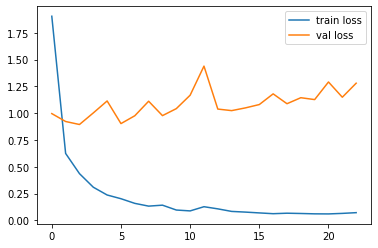

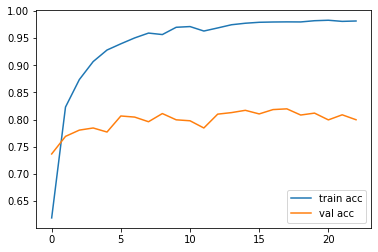

In [19]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
model.save('dnai.h5')

In [32]:
print("The accuracy of the model:{:.2f} %".format(result.history['accuracy'][-1]*100))
print("The accuracy of the testing:{:.2f} %".format(result.history['val_accuracy'][-1]*100))

The accuracy of the model:98.15 %
The accuracy of the testing:79.98 %


# Conclusion:
1. The sprint-1 deliverables where executed successfully.
2. The transfer learning CNN model was built using a huge 142 classes dataset.
3. The model achived an accuaracy of 98% in training and 80% in testing.